### Preparation

In [1]:
import sys, os
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### 30. 形態素解析結果の読み込み

In [2]:
i = 0
result = []
neko = open('data/neko.txt.mecab')
for line in neko:
    m = re.search(r'(?P<surface>.*?)\t(?P<pos>[^,]*),(?P<pos1>[^,]*),[^,]*,[^,]*,[^,]*,[^,]*,(?P<base>[^,]*),.*', line)
    i +=1
    if m:
        m_dict = {'surface':m.group('surface'), 'base':m.group('base'), 'pos':m.group('pos'), 'pos1':m.group('pos1')}
        result.append(m_dict)
        if i < 10:
            print(m_dict)
print('length: {}'.format(len(result)))

{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}
{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
length: 204147


### 31. 動詞

In [37]:
verb = set([morpheme['surface'] for morpheme in result if morpheme['pos']=='動詞'])
print(len(verb))
print(list(verb)[:10])

3893
['承る', '上げよ', 'ならべ', '消し', '嘆ぜ', 'あつかっ', '通り', '祝し', '抛り出す', '出直し']


### 32. 動詞の原形

In [35]:
infinitive = set([morpheme['base'] for morpheme in result if morpheme['pos']=='動詞'])
print(len(infinitive))
print(list(infinitive)[:10])

2300
['承る', 'あきれ返る', '試す', '潜り込む', '抛り出す', '劃する', '察す', 'あきれる', '心づく', '片付ける']


### 33. サ変名詞

In [33]:
sahen_noun = set([morpheme['base'] for morpheme in result if morpheme['pos']=='名詞'\
                  and morpheme['pos1']=='サ変接続'])
print(len(sahen_noun))
print(list(sahen_noun)[:10])

1271
['看破', '哀願', '諒察', '解釈', '自炊', '鼎坐', '混同', '暴露', '恐悦', 'きが']


### 34. 「AのB」

In [31]:
A_no_B = set(['{}の{}'.format(result[i]['surface'], result[i+2]['surface']) for i in np.arange(len(result)-2) \
             if result[i]['pos']=='名詞' and result[i+1]['surface']=='の' and result[i+2]['pos']=='名詞'])
print(len(A_no_B))
print(list(A_no_B)[:10])

4777
['舌の料理', 'コメディーの神様', '本社の方', '間の交際', '葉蘭の影', '細工の巻煙草', '大抵の場合', '運動のうち', '立ての四つ', '宴会の席']


### 35. 名詞の連結

In [7]:
longest_noun = ''
tmp = ''
for morpheme in result:
    if morpheme['pos'] == '名詞':
        tmp += morpheme['surface']
    else:
        if len(tmp) > len(longest_noun):
            longest_noun = tmp
        tmp = ''
print(longest_noun)

猫誉信女南無阿弥陀仏南無阿弥陀仏


### 36. 単語の出現頻度

In [41]:
words = [monopheme['surface'] for monopheme in result]
frequency = sorted(dict(Counter(words)).items(), key=lambda x: x[1])[::-1]
frequency[:10]

[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988)]

### 37. 頻度上位10語

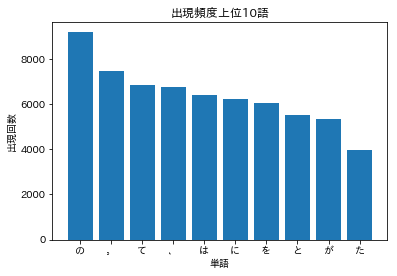

In [46]:
%matplotlib inline
label, height = [word[0] for word in frequency[:10]], [word[1] for word in frequency[:10]]
plt.bar(label, height)
plt.title('出現頻度上位10語')
plt.xlabel('単語')
plt.ylabel('出現回数')
plt.show()

### 38. ヒストグラム

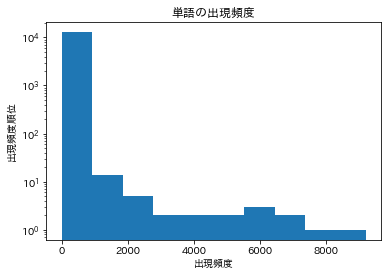

In [62]:
%matplotlib inline
plt.hist([morpheme[1] for morpheme in frequency]) #, bins=np.logspace(0, 4.5, 20))
plt.title('単語の出現頻度')
#plt.xscale('log')
plt.xlabel('出現頻度')
plt.yscale('log')
plt.ylabel('出現頻度順位')

plt.show()

### 39. Zipfの法則

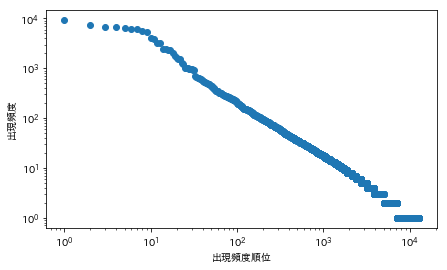

In [69]:
%matplotlib inline
plt.figure(figsize=(7, 4))
plt.scatter(np.arange(1, len(frequency)+1), [freq[1] for freq in frequency])
plt.xscale('log')
plt.xlabel('出現頻度順位')
plt.yscale('log')
plt.ylabel('出現頻度')
plt.show()